# supermarket sales and ratings

### complete Data Analysis and Visualisation

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
df=pd.read_csv("C:\\Users\Lenovo\Documents\data\\supermarket_sales.csv")
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [28]:
df.shape

(1000, 17)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [30]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [31]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [32]:
df.duplicated().sum()

0

In [33]:
df.corr()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,NaN,0.633962,-0.008778
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,NaN,0.705510,-0.015815
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Total,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,NaN,-0.036442,1.000000


In [34]:
df=df.drop(['Invoice ID','Date','Time'],axis=1)

In [35]:
df['gross margin percentage'].unique()

array([4.76190476])

In [36]:
df=df.drop(['gross margin percentage'],axis=1)

In [37]:
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,23.2880,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,30.2085,5.3


# data visuallization

In [39]:
df.shape

(1000, 13)

In [41]:
df['Gender'].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

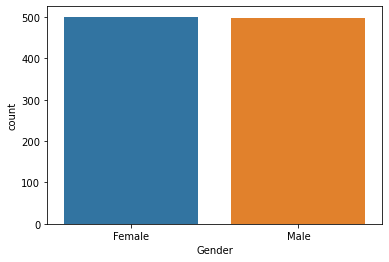

In [44]:
sns.countplot('Gender',data=df)

In [47]:
Gender_dummies=pd.get_dummies(df['Gender'])
Gender_dummies.head()

,Female,Male
0,1,0
1,1,0
2,0,1
3,0,1
4,0,1


In [48]:
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,23.2880,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,30.2085,5.3


In [49]:
df=pd.concat([df,Gender_dummies],axis=1)
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross income,Rating,Female,Male
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,26.1415,9.1,1,0
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,3.8200,9.6,1,0
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,16.2155,7.4,0,1
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,23.2880,8.4,0,1
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,30.2085,5.3,0,1


In [50]:
df=df.drop(['Gender'],axis=1)

In [51]:
df.head()

,Branch,City,Customer type,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross income,Rating,Female,Male
0,A,Yangon,Member,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,26.1415,9.1,1,0
1,C,Naypyitaw,Normal,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,3.8200,9.6,1,0
2,A,Yangon,Normal,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,16.2155,7.4,0,1
3,A,Yangon,Member,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,23.2880,8.4,0,1
4,A,Yangon,Normal,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,30.2085,5.3,0,1


<AxesSubplot:xlabel='Product line', ylabel='Female'>

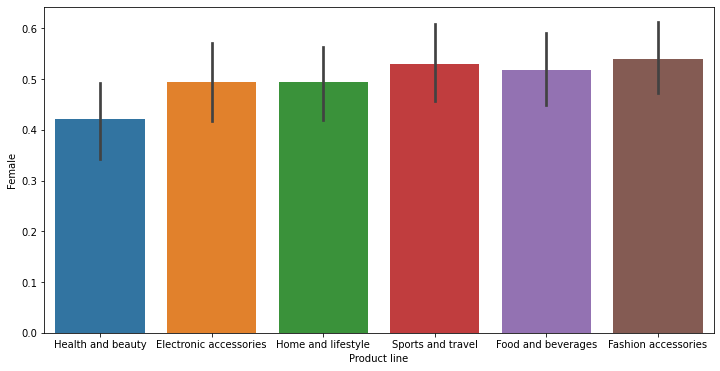

In [52]:
plt.figure(figsize=(12,6))
sns.barplot(x='Product line',y='Female',data=df)

<AxesSubplot:xlabel='Product line', ylabel='Male'>

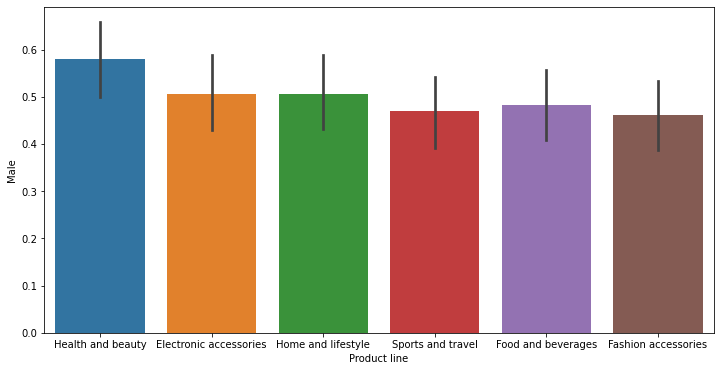

In [53]:
plt.figure(figsize=(12,6))
sns.barplot(x='Product line',y='Male',data=df)

# PLOTTING CUSTOMER PER CITY

In [54]:
place_df=pd.DataFrame(df['City'].value_counts())

In [55]:
place_df

,City
Yangon,340
Mandalay,332
Naypyitaw,328


<AxesSubplot:ylabel='City'>

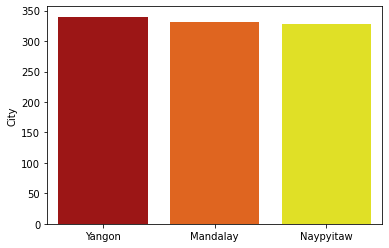

In [57]:
sns.barplot(x=place_df.index,y=place_df['City'],palette='hot')

In [64]:
payment_df=pd.DataFrame(df['Payment'].value_counts())
payment_df

,Payment
Ewallet,345
Cash,344
Credit card,311


<AxesSubplot:ylabel='Payment'>

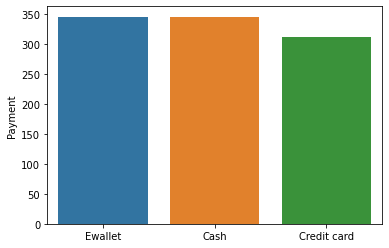

In [68]:
sns.barplot(x=payment_df.index, y=payment_df.Payment)

## GETTING GROSS INCOME PLOT EACH PRODUCT LINE

<AxesSubplot:xlabel='Product line', ylabel='gross income'>

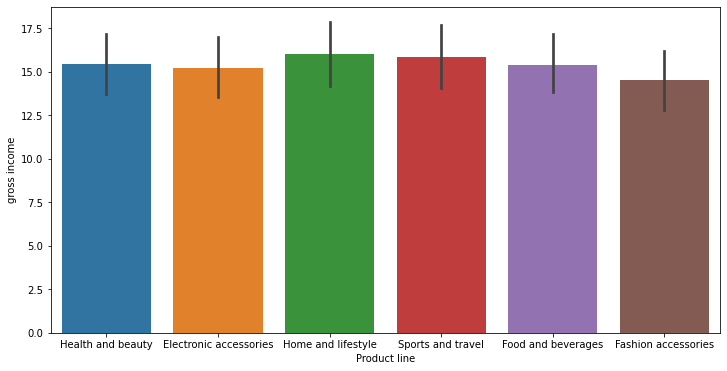

In [69]:
plt.figure(figsize=(12,6))
sns.barplot(x=df['Product line'],y=df['gross income'])

## getting rating plot for each product line

([<matplotlib.axis.XTick at 0x1cd21a47670>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

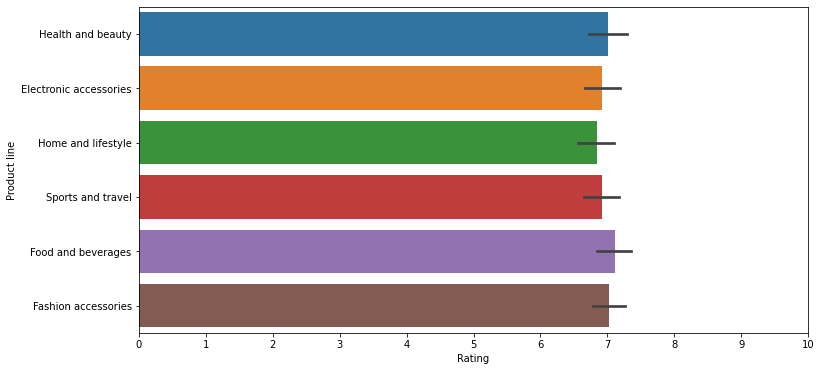

In [78]:
xdata = [0,1,2,3,4,5,6,7,8,9,10]
plt.figure(figsize=(12,6))
sns.barplot(y=df['Product line'], x=df['Rating'])
plt.xticks(xdata)


<AxesSubplot:xlabel='Product line', ylabel='Rating'>

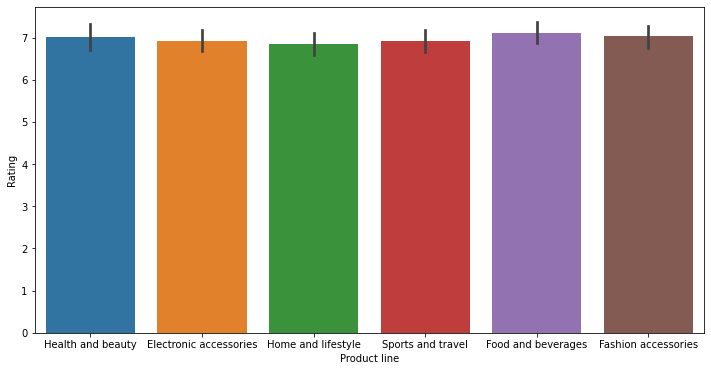

In [80]:
plt.figure(figsize=(12,6))
sns.barplot(x=df['Product line'],y=df['Rating'])

## total bill in each product line

<AxesSubplot:xlabel='Total', ylabel='Product line'>

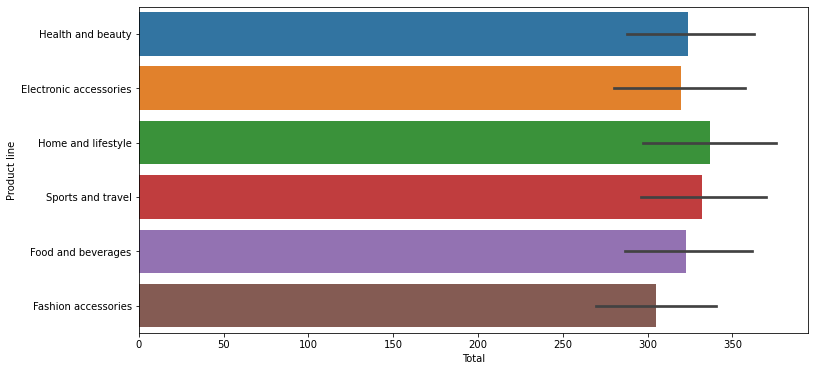

In [81]:
plt.figure(figsize=(12,6))
sns.barplot(x=df['Total'],y=df['Product line'])

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Quantity', ylabel='Density'>

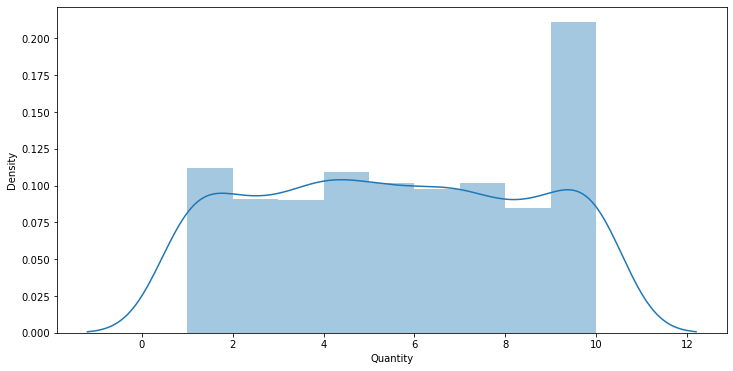

In [82]:
plt.figure(figsize=(12,6))
sns.distplot(df['Quantity'])

In [83]:
quantity=pd.DataFrame(df['Quantity'].value_counts())
quantity

,Quantity
10,119
1,112
4,109
7,102
5,102
6,98
9,92
2,91
3,90
8,85


<AxesSubplot:>

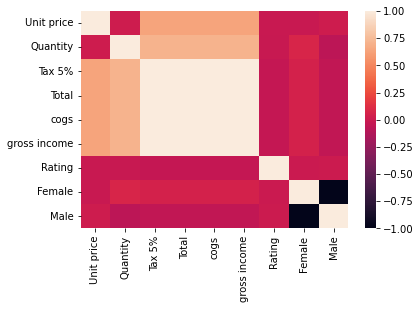

In [84]:
sns.heatmap(df.corr())

## Inference from the Analysis


## 1 Total Custumer =100
## 2 Total Females = 501
## 3 Total Males = 499
## 4 Min Ratings= 4
## 5 Max Ratings =10
## 6 Average Ratings = 6.97
## 7 best avearge ratings in food and Beverges
## 8 Max Average gross income in home and lifestyle
## 9 min Average gross income in fashion Accessories
## 10 maximum custumers buy 10 quantities
## 11 maximum average total bill in home and lifestyle


## 12 min avearge total bill in fashion accessories
## 13 maximum peoples comes from yahoon city
## 14 maximum average sales of fashion accessories in from female
## 15 max avearge sales of health & beuty is from males